<a href="https://colab.research.google.com/github/ajdivotf/systems-theory/blob/main/%D0%9F%D0%A3%D0%A0%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

лучше всего загружать txt файлы следующего вида:

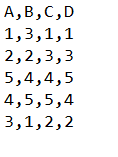

Saving данные для загрузки.txt to данные для загрузки.txt
Исходная матрица
   Э5  Э6  Э7
0   2   4   2
1   1   5   1
2   3   2   3
3   5   3   4
4   4   1   5
Вывести информацию по решению?
да
Матрицы упорядочения в канонической форме
Э5 V1 V2 V3 V4 V5
V1  0 -1  1  1  1
V2  1  0  1  1  1
V3 -1 -1  0  1  1
V4 -1 -1 -1  0 -1
V5 -1 -1 -1  1  0
Э6 V1 V2 V3 V4 V5
V1  0 -1 -1 -1 -1
V2  1  0  1 -1 -1
V3  1 -1  0 -1 -1
V4  1  1  1  0  1
V5  1  1  1 -1  0
Э7 V1 V2 V3 V4 V5
V1  0 -1  1  1  1
V2  1  0  1  1  1
V3 -1 -1  0  1  1
V4 -1 -1 -1  0  1
V5 -1 -1 -1 -1  0
Сортировать по убыванию или по возрастанию? Введите max или min
min
Ранжированный список объектов: V2 V1 V3 V5 V4
Матрица расстояний Кемени
   Э5 Э6 Э7
Э5  0 16  2
Э6 16  0 14
Э7  2 14  0
Матрица расстояний Кемени в относительных единицах
     Э5  Э6  Э7
 Э5   0 0.8 0.1
 Э6 0.8   0 0.7
 Э7 0.1 0.7   0
Матрица для графа
   Э5 Э6 Э7
Э5  0  0  1
Э6  0  0  0
Э7  1  0  0
Медиана  200.0
Сумма растояний по строкам  [18.0, 30.0, 16.0]
Сумма квад

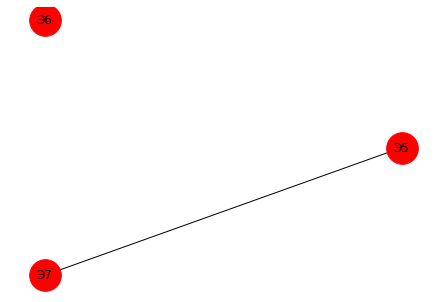

In [1]:
change_in_total_mismatch = 0 #изменение максимального рассогласования
last_mismatch = 0
threshold_mismatch = 5 #порог изменения
dporog = 0.15 #пороговое значение расстояния Кемени 
continue_cycle = True


import networkx as nx
import numpy.random as rnd
import matplotlib.pyplot as plt
from decimal import Decimal

while (continue_cycle):

  #загружаем файл с данными
  from google.colab import files
  uploaded = files.upload()


  #получаем название файла
  for key in uploaded.keys():
      filename = key
  #считываем как csv
  import pandas as pd
  df=pd.read_csv(filename)
  print('Исходная матрица')
  print(df)
 

  #получаем названия столбцов = вершин графа
  col_keys = list()
  for i in df:
    col_keys.append(i)
  #добавляем названия столбцов в стартовый массив
  mas = list()
  mas.append(col_keys)


  #получаем названия строк
  data_top = df.head()
  rows = list()
  for row in data_top.index:
      rows.append(row)
  arr = list()
  #получаем сами данные по экспертам
  for i in range(len(rows)):
    for k in col_keys:
      arr.append(df[k].to_list()[i])
    mas.append(arr)
    arr = list()

  def print_matrix(array):
      printed_arr = list()
      numbers = list(map(lambda x: 'V' + str(x), list(range(1, len(array[1]) + 1))))
      top_arr = [[array[0]] + numbers]
      arr_1 = array[1].copy()
      for i in range(len(arr_1)):
        arr_1[i] = ['V' + str(i + 1)] + arr_1[i]
      printed_arr.append(top_arr + arr_1)
      printed_arr = printed_arr[0]
      
      max_len = max([len(str(e)) for r in printed_arr for e in r])
      for row in printed_arr:
          print(*list(map('{{:>{length}}}'.format(length=max_len).format, row)))

  arr_res = list()
  col_and_row = list()
  print('Вывести информацию по решению?')
  question = input()
  if (question == 'да' or question == 'Да'):
    matrix_of_not = True
  else:
    matrix_of_not = False
  if matrix_of_not:
    print('Матрицы упорядочения в канонической форме')
  #получаем матрицы упорядочения в канонической форме для всех экспертов
  for k in col_keys:
    col_and_row = df[k].to_list()
    asc = df[k].to_list()
    asc.sort()
    res = list()
    arr = list()
    for j in asc:
      for i in asc:
        if (list(df[k]).index(i) > list(df[k]).index(j)):
          arr.append(1)
        elif (list(df[k]).index(i) < list(df[k]).index(j)):
          arr.append(-1)
        else:
          arr.append(0)
      res.append(arr)
      arr = list()
    arr_res.append(res)
    if (matrix_of_not):
      print_matrix([k, res]) #выводим матрицы в канонической форме

  start = mas
  items = "".join(map(str, [*range(len(col_keys))])) #из названий колонок формируем список цифр для получения комбинаций

  print('Сортировать по убыванию или по возрастанию? Введите max или min')
  max_or_min = input()
  data = mas[1:]
  sums_in_start_mas = list(map(lambda x: sum(x), data))
  sums_with_indices = dict(zip(list(range(len(sums_in_start_mas))), sums_in_start_mas))
  if max_or_min == 'max':
    sorted_sums = dict(sorted(sums_with_indices.items(), key=lambda item: item[1], reverse=True))
  else:
    sorted_sums = dict(sorted(sums_with_indices.items(), key=lambda item: item[1]))
  ranged = list(map(lambda x: 'V' + str(x + 1), list(sorted_sums.keys())))
  print('Ранжированный список объектов: ' + ' '.join(ranged))



  #получаем комбинации 12, 13, 14 и так далее
  combs = list() 
  from itertools import *
  for i in combinations(items, 2):
      combs.append([int(i[0]), int(i[1])])


  d = list()
  #сводим в матрицу рассогласования d, используя попарные комбинации combs - 12, 13, 14 и так далее
  #где цифры представляют собой имена экспертов - A, B, C,...
  for c in combs:
    count = 0
    for i in range(len(arr_res[c[0]])):
      for j in range(len(arr_res[c[0]][i])):
        count += abs(arr_res[c[0]][i][j] - arr_res[c[1]][i][j]) + abs(arr_res[c[1]][i][j] - arr_res[c[0]][i][j])
    d.append(count / 4)
    count = 0


  symbs = list()
  c = 0
  #соотносим ненулевые данные из d с вершинами
  for i in combinations(col_keys, 2):
      symbs.append([i[0], i[1], d[c]])
      c += 1
  dij = list()
  c = 0
  arr = list()
  #получаем матрицу
  for i in product(col_keys, repeat = 2):
    *res, = filter(lambda x: (x[0] == i[0] and x[1] == i[1]) or (x[0] == i[1] and x[1] == i[0]), symbs) #есть ли в d данные для таких вершин во всех возможных комбинациях
    if (len(res)):
      arr.append([i[0], i[1], res[0][2]]) #если есть, добавляем данные в массив, обозначая вершины
    else:
      arr.append([i[0], i[1], 0]) #если нет, там ноль
    c += 1 
    if (c == len(col_keys)): #с помощью c формируем строки dij, в строке столько записей, сколько названий столбцов = имен экспертов
      dij.append(arr);
      arr = list()
      c = 0 #завершили формирование строки
  line_sums = list() #сумма растояний по строкам
  line_square_sums = list() #сумма квадратов растояний по строкам
  #формируем эти величины
  for i in range(len(dij)):
    line_sums.append(sum(list(map(lambda x: x[2], dij[i]))))
    line_square_sums.append(sum(list(map(lambda x: x[2] * x[2], dij[i]))))
  median = min(line_square_sums) #вычисляем медиану
  dmax = (len(start) - 1) * (len(start) - 2) #вычисляем максимальное расстояние между ранжированиями
  total_summ = sum(line_sums) #общая сумма после тура

  def to_bool(s):
      return 1 if s == True else 0
  def print_arr(array):
    printed_arr = list()
    printed_arr.append([' '] + col_keys)

    for i in array:
      printed_arr.append([i[0][0]] + list(map(lambda x: (x[2], int(x[2]))[x[2] - int(x[2]) == 0.0], i)))
   
    max_len = max([len(str(e)) for r in printed_arr for e in r])
    for row in printed_arr:
        print(*list(map('{{:>{length}}}'.format(length=max_len).format, row)))

  dij0 = list()
  if matrix_of_not:
    print('Матрица расстояний Кемени')
    print_arr(dij)
  dij0 = [[[j[0], j[1], j[2] / dmax] for j in i] for i in dij] #переводим dij в относительные единицы
  if matrix_of_not:
    print('Матрица расстояний Кемени в относительных единицах')
    print_arr(dij0)
  dij0 = [[[j[0], j[1], to_bool(j[2] <= dporog and j[2] > 0) ] for j in i] for i in dij0] #сравниваем с пороговым значением
  if matrix_of_not:
    print('Матрица для графа')
    print_arr(dij0)

  if matrix_of_not:
    print('Медиана ', median)
    print('Сумма растояний по строкам ', line_sums)
    print('Сумма квадратов растояний по строкам ', line_square_sums)
    print('Общая сумма ', total_summ)

  graph = nx.Graph()
  graph
  #добавляем вершины
  for node in col_keys:
    graph.add_node(node)
    #рисуем вершины
  graph.nodes()
  def add_edge(f_item, s_item, graph=None):
    graph.add_edge(f_item, s_item)
    graph.add_edge(s_item, f_item)
  #добавляем рёбра
  for edge in dij0:
    for i in edge:
      if i[2] == 1:
        add_edge(i[0], i[1], graph=graph)
  #рисуем
  nx.draw_circular(graph,
            node_color='red',
            node_size=1000,
            with_labels=True)


  if (last_mismatch != 0):
    change_in_total_mismatch = abs(last_mismatch - total_summ) * 100 / last_mismatch
    if (change_in_total_mismatch <= threshold_mismatch):
      continue_cycle = False
  print('Изменение максимального рассогласования ', change_in_total_mismatch)
  end = input('Хотите закончить?')
  if (end == 'да' or end == 'Да'):
    continue_cycle = False
  last_mismatch = total_summ